## `Описание проекта`

Мне, как аналитику крупного интернет-магазина совместно с отделом маркетинга нашей компании поставлена задача по увеличению выручки компании. В ходе мозгового штурма нашей командой было подготовлено несколько гипотез. В ходе нашей дальнейшей работы остаётся эти гипотезы приоритизировать и провести А/В тесты и по итогу проанализировать получившиеся результаты.

В нашем распоряжении есть все необходимые данные:
- **`В файле hypothesis хранятся все сгенерированные гипотезы по увеличению выручки интернет-магазина с указанными параметрами:`**
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
    
    
- **`В файлах orders & visitors данные собранные в ходе проведения A/В теста:`**
 - orders:
    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.
    
 - visitors:   
    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста
    
    
- **`Список сгенерированных гипотез`**:

    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    - Запустить собственную службу доставки, что сократит срок доставки заказов
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
    - Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар,
    - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей,
    - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов,
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
    - Запустить акцию, дающую скидку на товар в день рождения'
    
**`План работы:`**
    
**В первой части работы начнём с приоритизаций гипотез**

**Во второй части рассмотрим и проанализируем результаты А/В теста**

## Приоритизация гипотез
- Задача
    - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as stats

In [3]:
pd.set_option('max_colwidth', 200)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = [i.lower() for i in hypothesis.columns] 

Дан датафрейм с 9 гипотезами. Для каждой гипотезы обьявлены параметры соответствующие важности этой гипотезы. Произвёл небольшую предобработку датафрейма.

Напомню, что значат параметры гипотез:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

**2.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [5]:
hypothesis["ICE"] = round(hypothesis["impact"]*hypothesis["confidence"]/hypothesis["efforts"],2)
hypothesis.sort_values(by="ICE",ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Приминив фреймворк ICE для приоритизации гипотез выяснили, что самая преорететная гипотеза - Запустить акцию, дающую скидку на товар в день рождения. По предварительной оценке это действие имеет большую важность для пользователей , мы достаточно уверены в этой гипотезе, что она окажет влияние на пользователей, осуществление проверки гипотезы не вызывает трудности.

**2.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [6]:
hypothesis["RICE"] = round(hypothesis["reach"]*hypothesis["impact"]*hypothesis["confidence"]/hypothesis["efforts"],2)
hypothesis.sort_values(by=["RICE"],ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Применив фреймворк RICE для приоритизации гипотез выяснили, что самая приоритетная гипотеза - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Охват данного действия больше половины аудитории, по предварительной оценке это действие имеет  важность для пользователей , мы достаточно уверены в этой гипотезе, что она окажет влияние на пользователей, осуществление проверки гипотезы не вызывает трудности.

**2.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

При использовании фреймворка RICE для приоритизации гипотез добавляется влияние действия от охвата аудитории. Так приоритетная гипотеза - `Запустить акцию, дающую скидку на товар в день рождения` из предыдущей оценки, выбыла из лидирующих из-за охвата аудитории, ведь количество пользователей, которые будут принимать участие в А/В тесте имеющие день рождения в даты проведения теста - очень мало. А вот гипотеза добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - будет иметь максимальную оценку по охвату аудитории.

## Анализ A/B-теста

3.1.1 Предобработка данных

In [7]:
try:
    orders = pd.read_csv("/datasets/orders.csv")
except:
    pass

In [8]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.isna().sum() # Посмотрим на пропуски в данных. Пропусков нет

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
orders.duplicated().sum() # Посмотрим на дубликаты в данных. Дубликатов нет

0

In [11]:
orders["date"] = pd.to_datetime(orders["date"]) # Изменим тип данных на тип для работы с датой

In [12]:
try:
    visitors = pd.read_csv("/datasets/visitors.csv")
except:
    pass

In [13]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
visitors.duplicated().sum() # Посмотрим на дубликаты в данных. Дубликатов нет

0

In [16]:
visitors["date"] = pd.to_datetime(visitors["date"]) # Изменим тип данных на тип для работы с датой

Проверим, насколько корректно была произведена разбивка пользователей на группы. Не попали ли одни и те же пользователи в разные группы.

In [17]:
orders_check = orders.groupby("visitorId").agg({"group":["unique","nunique"]}).reset_index()
orders_check.columns = ["visitorId","group","group_cnt"]
orders_checked = orders_check[orders_check["group_cnt"]>1]
len(orders_checked)

58

Дан датафрейм с данными о транзакциях от пользователей совершенные в определенные даты и выручкой от заказа. Две исследуемые группы А и В. Группа А является контрольной группой, для пользователей ничего не поменялось, а вот группа В является экспериментальной группой, на пользователях именно этой группы испытывается нововведение. Итак, в ходе предобработки данных пропусков и дубликатов в датафреймах: orders & visitors не обнаружено, тип данных в столбце - "дата" приведён к соответствующему типу даты. Также в ходе предобработки выяснили, что 58 пользователей в ходе проведения теста находятся в обеих группах. На мой взгляд удалить этих пользователей некорректно, поскольку они учтены в датафрейме посещений.

**3.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

In [18]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [19]:
ordersADaily = orders[orders["group"]=='A'][["date","visitorId","transactionId","revenue"]]\
.groupby("date",as_index=False).agg({"transactionId":"nunique","revenue":"sum"})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# Создадим срез по группе А, сгрупируем данные по дате, посчитаем количество заказов в день и выручку за день
# Переименовали столбцы датафрейма

In [20]:
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily["date"]<=x["date"]]\
                                       .agg({"date":"max","ordersPerDateA":"sum","revenuePerDateA":"sum"}),axis=1)\
                                       .sort_values(by="date")
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']
# Нашли кумулитивный доход и колчество заказов в течении августа в группе А 


In [21]:
ordersACummulative.head(5)


,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [22]:
ordersACummulative.tail(5)

,date,ordersCummulativeA,revenueCummulativeA
26,2019-08-27,495,3514698
27,2019-08-28,512,3615820
28,2019-08-29,534,3936510
29,2019-08-30,545,4022970
30,2019-08-31,557,4084803


In [23]:
ordersBDaily = orders[orders["group"]=='B'][["date","visitorId","transactionId","revenue"]]\
.groupby("date",as_index=False).agg({"transactionId":"nunique","revenue":"sum"})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# Создадим срез по группе B, сгрупируем данные по дате, посчитаем количество заказов в день и выручку за день  в группе В


In [24]:
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily["date"]<=x["date"]]\
                                       .agg({"date":"max","ordersPerDateB":"sum","revenuePerDateB":"sum"}),axis=1)\
                                       .sort_values(by="date")
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']
# Нашли кумулитивный доход и колчество заказов в течении августа в группе В

In [25]:
ordersBCummulative.head(5)

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [26]:
ordersBCummulative.tail(5)

,date,ordersCummulativeB,revenueCummulativeB
26,2019-08-27,548,5232260
27,2019-08-28,576,5328268
28,2019-08-29,596,5559398
29,2019-08-30,620,5774631
30,2019-08-31,640,5907760


In [27]:
# Проверим датафреймы на корректность дат
print(orders["date"].min())
print(orders["date"].max())
print(ordersACummulative["date"].min())
print(ordersACummulative["date"].max())
print(ordersBCummulative["date"].min())
print(ordersBCummulative["date"].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00


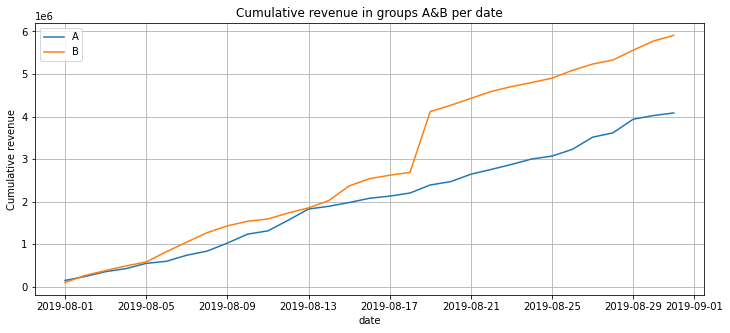

In [28]:
# Выведем графики кусулитивной выручки в анализируемых группах
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(ordersACummulative["date"],ordersACummulative["revenueCummulativeA"],label="A")
plt.plot(ordersBCummulative["date"],ordersBCummulative["revenueCummulativeB"],label="B")
plt.title('Cumulative revenue in groups A&B per date')
plt.xlabel('date')
plt.ylabel('Cumulative revenue')
plt.legend()
plt.show()

Вывод: Выручка растёт в обоих случаях. На графике видно, что практически в течении всего периода эксперимента выручка группы В была выше, чем в группе А. Также следует отметить, что кривая отображающая результат группы В имеет ярко выраженный скачок в период 18-19.08.2019, причём в группе А такого не наблюдается. Возможно, дело имеем с выбросом. Данный всплеск связан либо с увеличением числа заказов, либо с покупкой более дорогих товаров.

**3.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

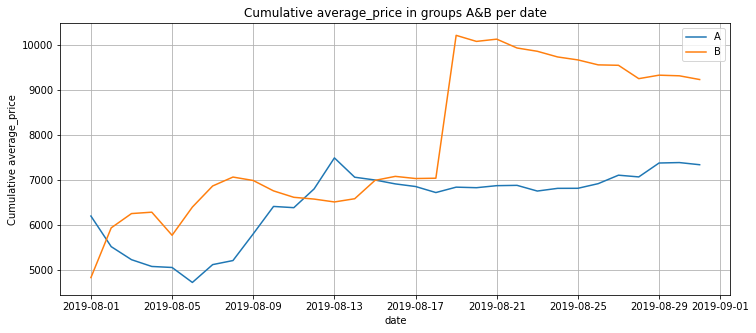

In [29]:
# Выведем графики кусулитивного среднего чека в анализируемых группах
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(ordersACummulative["date"],ordersACummulative["revenueCummulativeA"]/ordersACummulative["ordersCummulativeA"],label="A")
plt.plot(ordersBCummulative["date"],ordersBCummulative["revenueCummulativeB"]/ordersBCummulative["ordersCummulativeB"],label="B")
plt.title('Cumulative average_price in groups A&B per date')
plt.xlabel('date')
plt.ylabel('Cumulative average_price')
plt.legend()
plt.show()

Вывод: В течении первой недели 08-08-2019 видим коррелирующие между собой средние чеки для обеих групп. Далее метрики расходятся в разных направлениях. С 15-08-2019 метрики обеих групп расположились около значения 7000 У.Е. 18-08-2019 последовал самый крупный всплеск кривой среднего чека в группе В, после чего, практически до конца теста, средний чек снизился.
В группе А напротив, резких всплесков не наблюдалось, начиная с второй недели метрика стабилизировалась около значения в 7000 до конца теста.

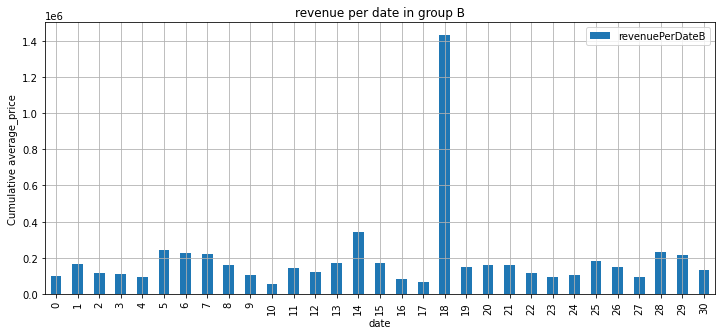

In [30]:
plt.figure(figsize=(12,5))
ordersBDaily["revenuePerDateB"].plot(kind="bar",grid=True)
plt.title('revenue per date in group B')
plt.xlabel('date')
plt.ylabel('Cumulative average_price')
plt.legend()
plt.show()

Вывод: Установленно, что 18-08-2019 устаовлен рекорд по дневной выручке, более чем в 6 раз превышает средний доход за месяц. Явный выброс.


**3.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

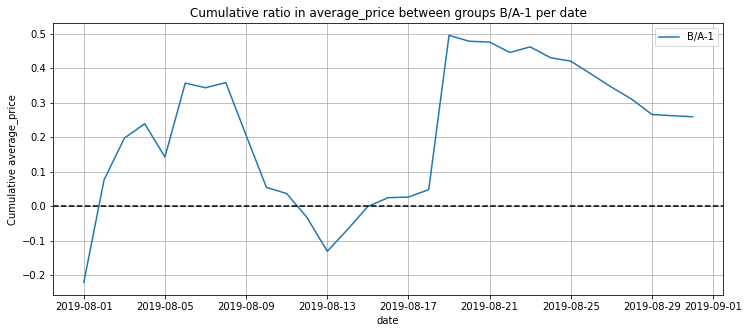

In [31]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(
    ordersBCummulative["date"]\
    ,(ordersBCummulative["revenueCummulativeB"]/ordersBCummulative["ordersCummulativeB"])/\
    (ordersACummulative["revenueCummulativeA"]/ordersACummulative["ordersCummulativeA"]) - 1,label="B/A-1"
)

plt.title('Cumulative ratio in average_price between groups B/A-1 per date')
plt.xlabel('date')
plt.ylabel('Cumulative average_price')
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend()
plt.show()


Вывод: Относительное значение метрики сильно варируются. На графике 18-09-2019 выглядит очень подозрительным.

**3.4 Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

Для постороения кумулитивного среднего нам понадобится знать кумулитивное количество посетителей по группам за каждый день.
Вычислим метрику на каждый день и по этой метрике постоим графики.

In [32]:
visitorsA = visitors[visitors["group"]=="A"]
visitorsB = visitors[visitors["group"]=="B"]

In [33]:
# Найдём кумулитивные значения посетителей на каждый день эксперимента
cumulativevisitorsA = visitorsA.apply(lambda x:visitorsA[visitorsA["date"]<=x["date"]]\
                                      .agg({"date":"max","visitors":"sum"}),axis=1)
cumulativevisitorsB = visitorsB.apply(lambda x:visitorsB[visitorsB["date"]<=x["date"]]\
                                      .agg({"date":"max","visitors":"sum"}),axis=1)

In [34]:
# Проведём некоторые преобразования для получения данных  в группе А. 
cumulativeDataA = ordersACummulative.merge(cumulativevisitorsA,on="date",how="left")
cumulativeDataA.columns = ["date","orders","revenue","visitors"]
cumulativeDataA["conversion"] = cumulativeDataA["orders"]/cumulativeDataA["visitors"]

In [35]:
# Проведём некоторые преобразования для получения данных о конверсии в группе В. 
cumulativeDataB = ordersBCummulative.merge(cumulativevisitorsB,on="date",how="left")
cumulativeDataB.columns = ["date","orders","revenue","visitors"]
cumulativeDataB["conversion"] = cumulativeDataB["orders"]/cumulativeDataB["visitors"]

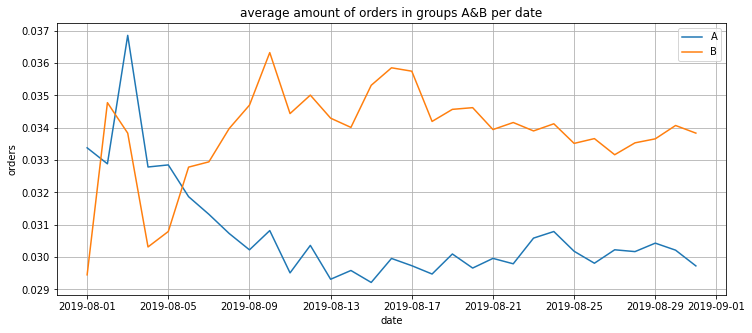

In [36]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(cumulativeDataA["date"],cumulativeDataA["conversion"],label="A")
plt.plot(cumulativeDataB["date"],cumulativeDataB["conversion"],label="B")
plt.title('average amount of orders in groups A&B per date')
plt.xlabel('date')
plt.ylabel('orders')
plt.legend()
plt.show()

Вывод: построили графики среднего количества заказов для исследуемых групп. Как видим кривая для группы В в течении всего эксперимента заметно выше, чем в контрольной группе - А. Что даёт нам полагать, о возросшем числе заказов в группе B, либо о снижении числа, посетителей.

**3.5 Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

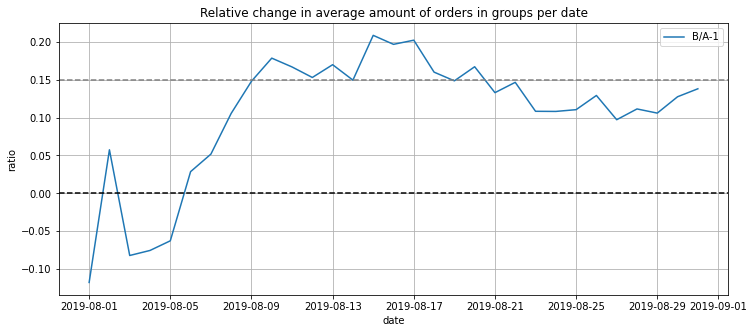

In [37]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(cumulativeDataB["date"],cumulativeDataB["conversion"]/cumulativeDataA["conversion"]-1,label="B/A-1")
plt.title('Relative change in average amount of orders in groups per date')
plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='gray', linestyle='--') 
plt.show()



Вывод: Относительное изменение кумулятивного среднего количества заказов на посетителя в группе В имеет положительную динамику, чем в группе А почти на протяжении всего эксперимента. Уже после первых 10 дней метрика группы В выше на 10-15% метрики группы А. На протяжении последних дней месяца виден небольшой рост метрики для группы В.

**3.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

In [38]:
# Найдём количество заказов на душу пользователей.
ordersByUsers = orders.groupby("visitorId",as_index=False).agg({"transactionId":"nunique"})
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


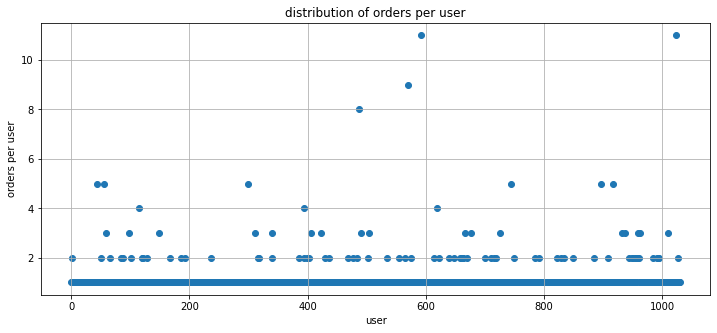

In [39]:
# Построим распределение заказоа на человека
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,5))
plt.grid(True)
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('distribution of orders per user')
plt.xlabel('user')
plt.ylabel('orders per user')
plt.show()



Вывод: На графике распредления заказов на человека, видим, что есть такие пользователи, кто делал заказ 11 раз за день! В среднем 1-2 заказ в день - это норма на первый взгляд, узнаем, сколько же заказов в день считать нормой?

**3.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [40]:
np.percentile(ordersByUsers['orders'],[95,99])


array([2., 4.])

Вывод: Найдя 95 и 99 перцентиль, выяснили, что лишь в 5% всех заказов пользователи преобретали больше 2 товаров. То есть, можем считать выбросами не влияющие на распределение число заказов на пользователя больше, чем 2.

**3.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

In [41]:
orders["revenue"].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

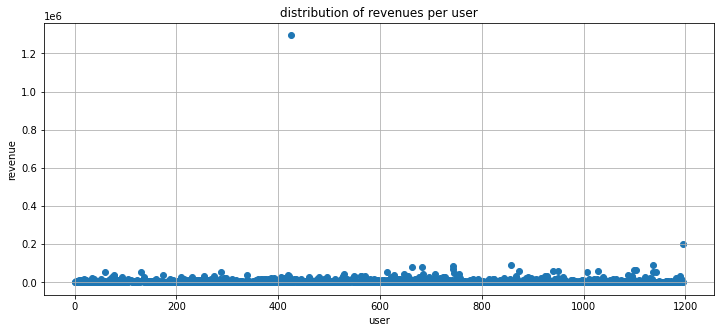

In [42]:
# Распределение стоимости заказов 
x_value = pd.Series(range(0,len(orders["revenue"])))

plt.figure(figsize=(12,5))
plt.grid(True)
plt.scatter(x_value, orders["revenue"]) 
plt.title('distribution of revenues per user')
plt.xlabel('user')
plt.ylabel('revenue')
plt.show()

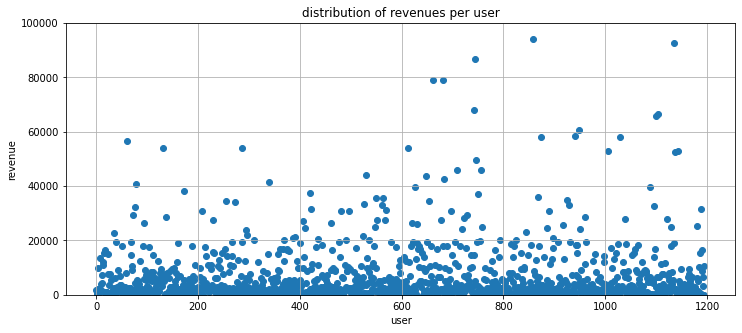

In [43]:
# Распределение стоимости заказов без учёта 2х максимальных вылетов
x_value = pd.Series(range(0,len(orders["revenue"])))
plt.figure(figsize=(12,5))
plt.grid(True)
plt.scatter(x_value, orders["revenue"]) 
plt.title('distribution of revenues per user')
plt.xlabel('user')
plt.ylabel('revenue')
plt.ylim(0,100000)
plt.show()

**3.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [44]:
np.percentile(orders["revenue"],[50,95,99,100])

array([   2978. ,   28000. ,   58233.2, 1294500. ])

Вывод: Медиана данного распредления до 3 тыс У.Е. В 95% заказов пользователи укладывались в бюджет - 28000У.Е. Единожды интернет-магазин посетил пользователь, который оставил более 1 млн. У.Е. Примем, что стоиомсть заказа превышающую 28000 У.Е. будем считать аномальной.

**3.10 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

Для расчета статистической значимости в среднем количестве заказов на посетителя по группа по "сырым" данным, нам следует определить:

    - Общую сумму посещения интернет-магазина по группам
    - Общее количество оформленных заказов пользователями
    - Возьмем разность для подсчета количества посещений без покупок, значение заказов приведем к 0
    - Преобразуем данные в массив данных, применим критерий Манна-Уитни.
Для определения статистически значимой разницы двух массивов будем использовать непараметрический критерий - Манна-Уитни. Дело в том, что как мы увидим позже, наши массивы будут иметь большое количество нулевых значений, а также проверив массив на нормальность распределения применив метод - Шапиро, узнали, что распределение далеко не похоже на нормальное. Поэтому, я считаю здесь мы не вправе применить параметрический критерий - Стьюдента, для определения р уровня значимости.

In [45]:
# Найдём распредление заказов от пользователя в группе А
ordersBYusersA = orders[orders["group"]=="A"].groupby("visitorId",as_index=False)\
                .agg({"transactionId":"nunique"})\
                .sort_values(by="transactionId",ascending=False)
ordersBYusersA.columns = ["userId", "orders"]

In [46]:
# Найдём распредление заказов от пользователя в группе B
ordersBYusersB = orders[orders["group"]=="B"].groupby("visitorId",as_index=False)\
                .agg({"transactionId":"nunique"})\
                .sort_values(by="transactionId",ascending=False)
ordersBYusersB.columns = ["userId", "orders"]

In [47]:
visitorsA["visitors"].sum() # число всех посещений интернет-магазина в группе А

18736

In [48]:
len(ordersBYusersB) # число всех покупок интернет-магазина в группе А

586

In [49]:
# Нашли пользоватлей не совершивших не одного заказа, значение в заказе привели к нулю
pd.Series(0,index=np.arange(visitorsA["visitors"].sum()-len(ordersBYusersA)),name="orders")

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [50]:
# Соберём всех пользователей совершивших и не совершавших заказы в один Сериеc по группам
sampleA = pd.concat([ordersBYusersA["orders"],pd.Series(0,index=np.arange(visitorsA["visitors"].sum()-len(ordersBYusersA)),name="orders")],axis=0)
sampleB = pd.concat([ordersBYusersB["orders"],pd.Series(0,index=np.arange(visitorsB["visitors"].sum()-len(ordersBYusersB)),name="orders")],axis=0)

`Сформулируем нулевую и альтернативную гипотезы:`

**Нулевая гипотеза:** Cтатистически значимых различий в распредлении признака в нашей выборки и нормальным распределение - не `наблюдается`.

**Альтернативная гипотеза:** Cтатистически значимых различий в распредлении признака в нашей выборки и нормальным распределение -  `наблюдаются.`

Для опредления p уровня значимости будем использовать значение **alpha = 0,05**

In [51]:
res = stats.shapiro(sampleA) # Проведём проверку массива данных на нормальность. 

print("p-value - {0:.3f}".format(stats.shapiro(sampleA)[1]))

p-value - 0.000


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Распределение признака в массиве данных группы А - не нормально.

`Сформулируем нулевую и альтернативную гипотезы:`

**Нулевая гипотеза:** Cтатистически значимых различий в среднем количестве заказов на посетителя в сырых данных между контрольной группой - А и  эксперементальной группой - В `не наблюдается.`

**Альтернативная гипотеза:** Cтатистически значимые различия в среднем количестве заказов на посетителя в сырых данных между контрольной группой - А и  эксперементальной группой - В `наблюдаются.`

Для опредления p уровня значимости будем использовать значение **alpha = 0,05**

In [52]:
# Применим критерий Мана-Уитни для получения  p уровня значимости для двух массивов данных.
print("p-value - {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("diff - {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value - 0.017
diff - 0.138


Вывод:
p-value = 0.017. Значение даёт нам право предположить, что нулевая гипотеза неверна так как значение меньше, чем статистически значимый уровень - 0,05. Из этого следует, что согласно сырым данным, наблюдается статистически значимое различие между массивами данных с средним числом заказов. Относительная разница в между исследуемой и контрольной группой составила, пракически 14%. 

**3.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

`Сформулируем нулевую и альтернативную гипотезы:`

**Нулевая гипотеза:** Cтатистически значимых различий в среднем чеке  в сырых данных между контрольной группой - А и  эксперементальной группой - В `не наблюдается.`

**Альтернативная гипотеза:** Cтатистически значимые различия в среднем чеке в сырых данных между контрольной группой - А и  эксперементальной группой - В `наблюдаются.`

Для опредления p уровня значимости будем использовать значение **alpha = 0,05**

In [53]:
# Применим критерий Мана-Уитни для получения  p уровня значимости для двух массивов данных.
print("p-value - {0:.3f}".format(stats.mannwhitneyu(orders.loc[orders["group"]=="A","revenue"], orders.loc[orders["group"]=="B","revenue"])[1]))
print("diff - {0:.3f}".format((orders.loc[orders["group"]=="B","revenue"].mean()/ orders.loc[orders["group"]=="A","revenue"].mean() - 1)))

p-value - 0.729
diff - 0.259


Вывод: 
p-value = 0.729. Значение даёт нам право предположить, что нулевая гипотеза верна так как значение больше, чем статистически значимый уровень alpha - 0,05. Из этого следует, что согласно сырым данным, не наблюдается статистически значимого различия между массивами данных с средним чеком. Но всё же стоит обратить внимание, что средний чек в исследуемой группе - В выше, чем в группе А.

**3.12 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Для начала почистим данные. Для начала найдём сами аномалии и посчитаем сколько выбросов в данных

In [54]:
# Найдём ID пользователей, которые совершили более 2 покупок
usersWithManyOrders = pd.concat(
    [ordersBYusersA[ordersBYusersA['orders'] > np.percentile(ordersBYusersA['orders'],95)]['userId'],ordersBYusersB[ordersBYusersB['orders'] > np.percentile(ordersBYusersA['orders'],95)]['userId'],],axis=0,)

In [55]:
usersWithManyOrders

499    4256040402
227    2038680547
278    2458001652
269    2378935119
18      199603092
23      237748145
467    3967698036
349    2988190573
146    1230306981
68      611059232
237    2108163459
189    1614305549
456    3908431265
340    2458001652
326    2378935119
501    3717692402
514    3803269165
580    4256040402
424    3062433592
382    2742574263
37      249864742
360    2587333274
68      457167155
284    2038680547
Name: userId, dtype: int64

In [56]:
# Нашли пользователей у которых стоимость заказа превышает - 28000 У.Е., т.е. является выбросами.
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],95)]['visitorId']
usersWithExpensiveOrders.columns=["userId"]

In [57]:
# объеденим всех пользователей с выбросами
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())
abnormalUsers

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Length: 74, dtype: int64

Вывод:
Нашли ID пользователей, которые являются выбросами для наших данных. Всего таких уникальных пользователей - 74.

In [58]:
# Составим массив данных по среднему числу заказов без учёта вылетов для соответствующих групп:
sampleAFiltered = pd.concat( [ordersBYusersA.loc[np.logical_not(ordersBYusersA["userId"].isin(abnormalUsers)),"orders"],\
            pd.Series(0,index=np.arange(visitorsA["visitors"].sum()-len(ordersBYusersA)),name="orders") ],axis=0)

sampleBFiltered = pd.concat( [ordersBYusersB.loc[np.logical_not(ordersBYusersB["userId"].isin(abnormalUsers)),"orders"],\
            pd.Series(0,index=np.arange(visitorsB["visitors"].sum()-len(ordersBYusersB)),name="orders") ],axis=0)

`Сформулируем нулевую и альтернативную гипотезы:`

**Нулевая гипотеза:** Cтатистически значимых различий в среднем количестве заказов на посетителя в очищенных данных между контрольной группой - А и  эксперементальной группой - В `не наблюдается.`

**Альтернативная гипотеза:** Cтатистически значимые различия в среднем количестве заказов на посетителя в очищенных данных между контрольной группой - А и  эксперементальной группой - В `наблюдаются.`

Для опредления p уровня значимости будем использовать значение **alpha = 0,05**

In [59]:
# Применим критерий Мана-Уитни для получения  p уровня значимости для двух массивов данных.
print("p-value - {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("diff - {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value - 0.013
diff - 0.173


Вывод:
p-value = 0.013. Значение даёт нам право предположить, что нулевая гипотеза неверна так как значение меньше, чем статистически значимый уровень - 0,05. Из этого следует, что согласно очищенным данным, наблюдается статистически значимое различие между массивами данных с средним числом заказов. Относительная разница между группами составила, пракически 17%. 


**3.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

`Сформулируем нулевую и альтернативную гипотезы:`

**Нулевая гипотеза:** Cтатистически значимых различий в среднем чеке  в очищенных данных между контрольной группой - А и  эксперементальной группой - В `не наблюдается.`

**Альтернативная гипотеза:** Cтатистически значимые различия в среднем чеке в очищенных данных между контрольной группой - А и  эксперементальной группой - В `наблюдаются.`

Для опредления p уровня значимости будем использовать значение **alpha = 0,05**

In [60]:
# Применим критерий Мана-Уитни для получения  p уровня значимости для двух массивов данных.
print("p-value - {0:.3f}".format(stats.mannwhitneyu
                (
                orders.loc[ (orders["group"]=="A") & (np.logical_not(orders["visitorId"].isin(abnormalUsers))),"revenue"], 
                orders.loc[ (orders["group"]=="B") & (np.logical_not(orders["visitorId"].isin(abnormalUsers))),"revenue"])[1])
                )

      
print("diff - {0:.3f}".format(
    (orders.loc[ (orders["group"]=="B") & (np.logical_not(orders["visitorId"].isin(abnormalUsers))),"revenue"]).mean()/
    orders.loc[ (orders["group"]=="A") & (np.logical_not(orders["visitorId"].isin(abnormalUsers))),"revenue"].mean() - 1)
     )

p-value - 0.738
diff - -0.020


Вывод: 
p-value = 0.738. Значение даёт нам право предположить, что нулевая гипотеза верна так как значение больше, чем статистически значимый уровень alpha - 0,05. Из этого следует, что согласно очищенным данным, не наблюдается статистически значимого различия между массивами данных с средним чеком. Но всё же стоит обратить внимание, что средний чек в исследуемой группе - В оказался ниже, чем в группе А на 2 %.

**3.14 Примите решение по результатам теста и объясните его.**

Полученный результат А/B теста на сырых данных показал, что:
- что согласно сырым данным, наблюдается статистически значимое различие между массивами данных с средним числом заказов. Относительная разница между исследуемеой и контрольной группой составила, пракически 14%. 
-   Из этого следует, что согласно сырым данным, не наблюдается статистически значимого различия между массивами данных с средним чеком. Но всё же стоит обратить внимание, что средний чек в исследуемой группе - В больше на 26%, чем в группе А.

Полученный результат А/B теста на очищенных данных от выбросов показал, что:

- Из этого следует, что согласно очищенным данным, наблюдается статистически значимое различие между массивами данных с средним числом заказов. Относительная разница между исследуемеой и контрольной группой составила, пракически 17%. 
- что согласно очищенным данным, не наблюдается статистически значимого различия между массивами данных с средним чеком. Но всё же стоит обратить внимание, что средний чек в исследуемой группе - В оказался ниже, чем в группе А на 2 %.

`Итак, подведём итог А/B теста:`
- У нас есть основание полагать, что мы имеем статистическую значимую разницу в масивах с средним числом заказов. То есть, данная гипотеза - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок увеличила число заказов в исследуемой группе В на 17% по сравнению с контрольной А.
- А вот статистически значимой разницы в среднем чеке мы не обнаружили. Причём, чтоит обратить внимание, что средний чек в группе В оказался немного меньше, чем в группе А при исследовании очищенных данных, в то время как на сырых данных видели преимущество группы В на 26%.

**На мой взгляд стоит завершить тест, поскольку получены значимые различия в среднем количестве заказов между группами и значение стабилизировалось у определенного значения. Следует признать, что эксперемантальная группа победила контрольную группу.**

## Итоговый вывод

**Выявление преорететной гипотезы.**

Итак, было предложенно 9 гипотез для увеличении выручки интернет-магазина. При использовании фреймворка RICE для приоритизации гипотез было выяснено, что наиболее преорететной гипотезой стоит считать - `добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`.

**Предобработка данных.**

Дан датафрейм с данными о транзакциях от пользователей совершенные в определенные даты и выручкой от заказа. Две исследуемые группы А и В. Группа А является контрольной группой, для пользователей ничего не поменялось, а вот группа В является экспериментальной группой, на пользователях именно этой группы испытывается нововведение. Итак, в ходе предобработки данных пропусков и дубликатов в датафреймах: orders & visitors не обнаружено, тип данных в столбце - "дата" приведён к соответствующему типу даты. Также в ходе предобработки выяснили, что 58 пользователей в ходе проведения теста находятся в обеих группах. На мой взгляд удалить этих пользователей некорректно, поскольку они учтены в датафрейме посещений.

**Выручка.**

Выручка растёт в обоих случаях. На графике видно, что практически в течении всего периода эксперимента выручка группы В была выше, чем в группе А. Также следует отметить, что кривая отображающая результат группы В имеет ярко выраженный скачок в период 18-19.08.2019, причём в группе А такого не наблюдается. Возможно, дело имеем с выбросом. Данный всплеск связан либо с увеличением числа заказов, либо с покупкой более дорогих товаров.

**Средний чек.**

В течении первой недели 08-08-2019 видим коррелирующие между собой средние чеки для обеих групп. Далее метрики расходятся в разных направлениях. С 15-08-2019 метрики обеих групп расположились около значения 7000 У.Е. 18-08-2019 последовал самый крупный всплеск кривой среднего чека в группе В, после чего, практически до конца теста, средний чек снижался. В группе А напротив, резких всплесков не наблюдалось, начиная с второй недели метрика стабилизировалась около значения в 7000 до конца теста. Установленно, что 18-08-2019 устаовлен рекорд по дневной выручке, более чем в 6 раз превышает средний доход за месяц. Явный выброс.

**Среднее количество заказов на посетителя.**

Значение для группы В в течении всего эксперимента заметно выше, чем в контрольной группе - А. Что даёт нам полагать, о возросшем числе заказов в группе B, либо о снижении числа, посетителей.

**Прирост среднего количества заказов в группе В**

Относительное изменение кумулятивного среднего количества заказов на посетителя в группе В имеет положительную динамику, чем в группе А почти на протяжении всего эксперимента. Уже после первых 10 дней метрика группы В выше на 10-15% метрики группы А. На протяжении последних дней месяца виден небольшой рост метрики для группы В.

**Определение выбросов**

На графике распредления заказов на человека, видим, что есть такие пользователи, кто делал заказ 11 раз за день! В среднем 1-2 заказ в день - это норма на первый взгляд. Найдя 95 и 99 перцентиль, выяснили, что лишь в 5% всех заказов пользователи преобретали больше 2 товаров. То есть, можем считать выбросами не влияющие на распределение число заказов на пользователя больше, чем 2.
Медиана  распредления стоимости заказа до 3 тыс У.Е. В 95% заказов пользователи укладывались в бюджет - 28000У.Е. Единожды интернет-магазин посетил пользователь, который оставил более 1 млн. У.Е. Примем, что стоиомсть заказа превышающую 28000 У.Е. будем считать аномальной.

**Полученный результат А/B теста на сырых данных показал, что:**

Полученный результат А/B теста на сырых данных показал, что:
- что согласно сырым данным, наблюдается статистически значимое различие между массивами данных с средним числом заказов. Относительная разница между исследуемеой и контрольной группой составила, пракически 14%. 
-   Из этого следует, что согласно сырым данным, не наблюдается статистически значимого различия между массивами данных с средним чеком. Но всё же стоит обратить внимание, что средний чек в исследуемой группе - В больше на 26%, чем в группе А.

Полученный результат А/B теста на очищенных данных от выбросов показал, что:

- Из этого следует, что согласно очищенным данным, наблюдается статистически значимое различие между массивами данных с средним числом заказов. Относительная разница между исследуемеой и контрольной группой составила, пракически 17%. 
- что согласно очищенным данным, не наблюдается статистически значимого различия между массивами данных с средним чеком. Но всё же стоит обратить внимание, что средний чек в исследуемой группе - В оказался ниже, чем в группе А на 2 %.


Итак, подведём итог А/B теста:

У нас есть основание полагать, что мы имеем статистическую значимую разницу в группах с средним числом заказов. То есть, данная гипотеза - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок увеличила количество заказов в исследуемой группе В на 17% по сравнению с контрольной А.
А вот статистически значимой разницы в среднем чеке мы не обнаружили. Причём, стоит обратить внимание, что средний чек в группе В оказался немного меньше, чем в группе А при исследовании очищенных данных, в то время как на сырых данных видели преимущество группы В на 26%.

**На мой взгляд стоит завершить тест, поскольку получены значимые различия в среднем количестве заказов между группами и значение стабилизировалось у определенного значения. Следует признать, что эксперемантальная группа победила контрольную группу.**

